<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">1. INTRODUCTION</div>

This notebook is to employ DNN model in Classification problem. The model is applied to the following dataset:
1. Churn - BinaryClass
2. MNIST - MultiClass

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">2. SETUP</div>

## <font color=red>**2.1. Import library**</font>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">3. CHURN MODELLLING</div>

 ## <font color=red>**3.1. Data**</font>


In [2]:
df = pd.read_csv('../00-Data/data/Churn_Modelling.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <font color=red>**3.2. Data Processing**</font>

In [3]:
# select features
selected_features = df.columns.values[3:13]

# split data to input and target
X = df[selected_features]
y = df['Exited']

# Label Encoding Gender
gender_le = LabelEncoder()
X[['Gender']] = X[['Gender']].apply(gender_le.fit_transform)
# Dummy vars for Geography
geo_ohe = OneHotEncoder() 
geo_dummies = geo_ohe.fit_transform(X.Geography.values.reshape(-1,1)).toarray()
geo_dummies = pd.DataFrame(geo_dummies, columns= ["Geography_"+str(int(i)) for i in range(geo_dummies.shape[1])])
X = pd.concat([X, geo_dummies], axis=1)
X = X.drop(columns='Geography')

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=101)
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train.shape, X_valid.shape, X_test.shape

((7200, 12), (800, 12), (2000, 12))

## <font color=red>**3.3. Model**</font>

In [4]:
# Import libaries and packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.metrics import categorical_crossentropy

 ### <font color=blue>**Architecture**

In [14]:
keras.backend.clear_session()
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

n_inputs = 12
# Initialize
model = Sequential()
# Adding input layers and first hidden layer
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu', input_dim=n_inputs))
# Adding second hidden layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
# Adding the output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [15]:
# View layers
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)

[<keras.layers.core.dense.Dense object at 0x000001495AFBF580>, <keras.layers.core.dense.Dense object at 0x000001494AE842B0>, <keras.layers.core.dense.Dense object at 0x000001495AAA55E0>]
dense_1


In [16]:
weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print()
print(biases.shape)
print(biases)

(30, 15)
[[ 1.87891237e-02 -1.55211613e-03  4.30994369e-02 -2.47812998e-02
   2.31154002e-02  3.92568223e-02  4.46748249e-02  2.49334089e-02
  -1.50743723e-02  4.71825525e-03 -2.38396060e-02  1.97343268e-02
  -3.80374193e-02  3.48434597e-03  2.14896835e-02]
 [ 3.75017785e-02 -1.60325058e-02 -3.26223746e-02 -5.81479073e-03
   4.00826074e-02 -3.61961350e-02 -3.77820246e-02  7.54491240e-03
   4.41718139e-02  4.18658517e-02  9.70847532e-03  1.10948198e-02
   3.20862643e-02  3.32697891e-02  3.91584896e-02]
 [-4.86227758e-02 -1.92534178e-04  7.50366598e-03  1.85619481e-02
   2.59727873e-02  4.08944003e-02 -9.09978151e-03  3.76515426e-02
   3.89002636e-03 -7.26690143e-03 -9.88269970e-03  1.66232474e-02
  -3.36519368e-02 -3.17797549e-02  4.70401756e-02]
 [-4.38602678e-02  3.03474814e-03  4.86999415e-02 -2.53055245e-03
   3.64675410e-02 -2.96989325e-02 -3.85515466e-02 -1.48997530e-02
   1.82271861e-02 -3.18911299e-02  3.16348113e-02  1.56516545e-02
   4.25825603e-02 -2.60828491e-02  3.36595811e

 ### <font color=blue>**Training model**

In [17]:
history = model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_valid, y_valid.values),
          batch_size=10,
          epochs=100,
          #verbose=1
         )
#history = dnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=5, epochs=20, shuffle=True, verbose=2)

Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4582 - accuracy: 0.8014 - val_loss: 0.4179 - val_accuracy: 0.8200
Epoch 2/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4191 - accuracy: 0.8240 - val_loss: 0.4093 - val_accuracy: 0.8325
Epoch 3/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4113 - accuracy: 0.8332 - val_loss: 0.4009 - val_accuracy: 0.8338
Epoch 4/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4056 - accuracy: 0.8343 - val_loss: 0.3964 - val_accuracy: 0.8425
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8353 - val_loss: 0.3902 - val_accuracy: 0.8487
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8397 - val_loss: 0.3838 - val_accuracy: 0.8475
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8396 - val_loss: 0.3739 - val_accuracy: 0.8600

Epoch 58/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3208 - accuracy: 0.8675 - val_loss: 0.3564 - val_accuracy: 0.8575
Epoch 59/100
720/720 [==============================] - 2s 3ms/step - loss: 0.3212 - accuracy: 0.8672 - val_loss: 0.3576 - val_accuracy: 0.8537
Epoch 60/100
720/720 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8664 - val_loss: 0.3583 - val_accuracy: 0.8512
Epoch 61/100
720/720 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8667 - val_loss: 0.3566 - val_accuracy: 0.8612
Epoch 62/100
720/720 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8692 - val_loss: 0.3549 - val_accuracy: 0.8512
Epoch 63/100
720/720 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8681 - val_loss: 0.3551 - val_accuracy: 0.8575
Epoch 64/100
720/720 [==============================] - 2s 2ms/step - loss: 0.3208 - accuracy: 0.8672 - val_loss: 0.3549 - val_accuracy:

 ### <font color=blue>**Plot loss history**

In [18]:
print(model.history.params)
print(model.history.epoch)
print(model.history.history.keys())

{'verbose': 1, 'epochs': 100, 'steps': 720}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Axes: >

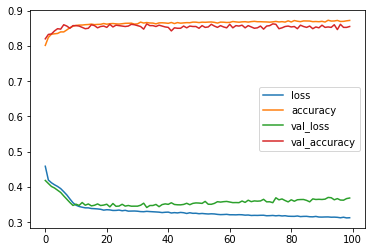

In [19]:
loss_hist = pd.DataFrame(model.history.history)
loss_hist.plot()

 ### <font color=blue>**Performance Evaluation**

#### Accuracy

In [20]:
# prediction
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred >= 0.5)
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred >= 0.5)

# confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

[[5522  227]
 [ 689  762]]


In [21]:
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))      

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1577
           1       0.72      0.55      0.62       423

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000

[[1485   92]
 [ 191  232]]


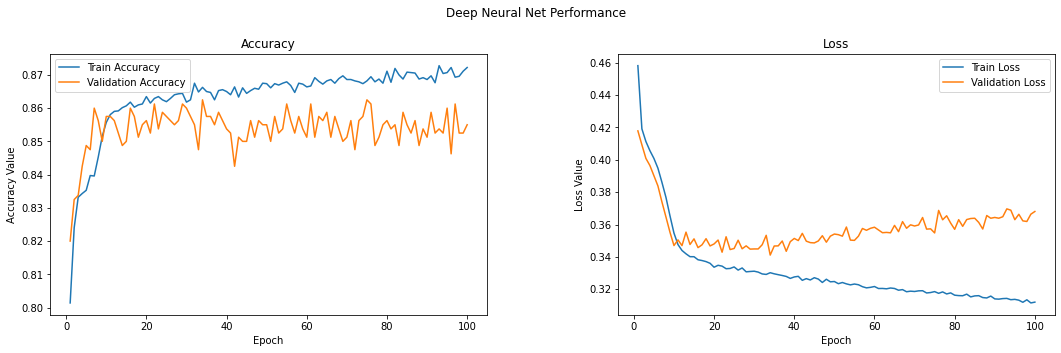

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = np.array(range(1,101))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
#ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
#ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## <font color=red>**3.4. Early Stopping**</font>

 ### <font color=blue>**Early Stop**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
keras.backend.clear_session()
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=[early_stop],
          verbose=1
         )

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4534 - val_loss: 0.4150
Epoch 2/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4085 - val_loss: 0.3913
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3832 - val_loss: 0.3713
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3657 - val_loss: 0.3631
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3552 - val_loss: 0.3563
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3490 - val_loss: 0.3608
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3447 - val_loss: 0.3551
Epoch 8/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3423 - val_loss: 0.3556
Epoch 9/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3405 - val_loss: 0.3547
Epoch 10/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3389 - val_lo

<Axes: >

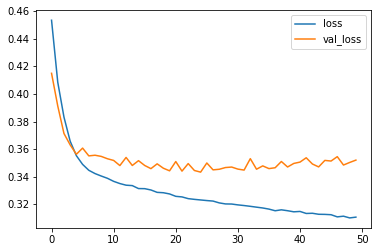

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
# prediction
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[5520,  229],
       [ 706,  745]], dtype=int64)

In [36]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[1487,   90],
       [ 187,  236]], dtype=int64)

In [37]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1577
           1       0.72      0.56      0.63       423

    accuracy                           0.86      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000

[[1487   90]
 [ 187  236]]


 ### <font color=blue>**Adding in DropOut Layers**

In [38]:
from tensorflow.keras.layers import Dropout
keras.backend.clear_session()
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train,
          y=y_train,
          epochs=200,
          validation_data=(X_valid, y_valid),
          verbose=1,
          callbacks=[early_stop]
         )

Epoch 1/200
225/225 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.4503
Epoch 2/200
225/225 [==============================] - 0s 2ms/step - loss: 0.5015 - val_loss: 0.4401
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4842 - val_loss: 0.4344
Epoch 4/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4666 - val_loss: 0.4317
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4608 - val_loss: 0.4273
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4557 - val_loss: 0.4214
Epoch 7/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4511 - val_loss: 0.4159
Epoch 8/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4397 - val_loss: 0.4075
Epoch 9/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4395 - val_loss: 0.3999
Epoch 10/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4314 - val_lo

225/225 [==============================] - 0s 2ms/step - loss: 0.3707 - val_loss: 0.3467
Epoch 82/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3681 - val_loss: 0.3458
Epoch 83/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3713 - val_loss: 0.3467
Epoch 84/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3763 - val_loss: 0.3474
Epoch 85/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3659 - val_loss: 0.3450
Epoch 86/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3749 - val_loss: 0.3436
Epoch 87/200
225/225 [==============================] - 1s 2ms/step - loss: 0.3707 - val_loss: 0.3427
Epoch 88/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3772 - val_loss: 0.3450
Epoch 89/200
225/225 [==============================] - 1s 2ms/step - loss: 0.3717 - val_loss: 0.3424
Epoch 90/200
225/225 [==============================] - 1s 3ms/step - loss: 0.3660 - val_loss: 

<Axes: >

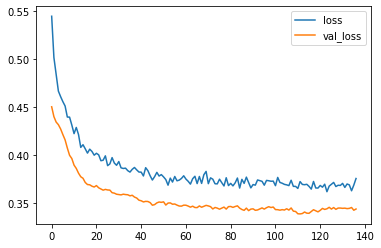

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
# prediction
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[5653,   96],
       [ 880,  571]], dtype=int64)

In [41]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[1546,   31],
       [ 237,  186]], dtype=int64)

In [42]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.86      0.44      0.58       423

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1546   31]
 [ 237  186]]


## <font color=red>**5. Tuning hyper parameters**</font>

 ### <font color=blue>**Tuning hyper parameters**

In [43]:
def build_classifier(n_hidden=3, 
                     n_neurons=30, 
                     learning_rate=3e-3, 
                     dropout_rate=0.2, 
                     activation='relu',
                     init='uniform',
                     input_shape=X_train.shape[1:]):
    # clear old session
    keras.backend.clear_session()
    tf.keras.backend.clear_session()
    np.random.seed(99)
    tf.random.set_seed(99)
   
    # build model
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, kernel_initializer=init, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(keras.layers.Dense(units=1,  kernel_initializer=init, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learning_rate)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [44]:
seed = 6
classifer = KerasClassifier(build_fn = build_classifier, verbose=1)
param_grid = {
    # Do a grid search to find the optimal number of neurons in each hidden layer
    "n_hidden": [3],
    "n_neurons": [20,30],    
    #'neuron1': [30],
    #'neuron2': [15],    
    # Do a grid search for the optimal batch size and number of epochs
    'batch_size': [15,32],
    'epochs': [20,50],
    # Do a grid search for learning rate and dropout rate
    'learning_rate': [0.1],
    'dropout_rate': [0.2],
    # Do a grid search to optimize kernel initialization and activation functions
    'activation': ['relu'],
    'init': ['uniform']
}

grid_search = GridSearchCV(estimator = classifer,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           #cv = 5, 
                           cv=KFold(5,random_state=seed), 
                           # verbose=10
                          )
grid_search_result = grid_search.fit(X_train, y_train)

Epoch 1/20
384/384 [==============================] - 2s 3ms/step - loss: 0.5374 - accuracy: 0.7946
Epoch 2/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.7960
Epoch 3/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7965
Epoch 4/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.7965
Epoch 5/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.7962
Epoch 6/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.7960
Epoch 7/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7964
Epoch 8/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.7965
Epoch 9/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.7965
Epoch 10/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5080 - accuracy: 0.7965

384/384 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.7964
Epoch 3/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7964
Epoch 4/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.7964
Epoch 5/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.7964
Epoch 6/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5081 - accuracy: 0.7964
Epoch 7/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7964
Epoch 8/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5092 - accuracy: 0.7964
Epoch 9/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7964
Epoch 10/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7964
Epoch 11/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.7964
Epoch 12/

384/384 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.7991
Epoch 4/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.7991
Epoch 5/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7991
Epoch 6/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5031 - accuracy: 0.7991
Epoch 7/20
384/384 [==============================] - 1s 2ms/step - loss: 0.9080 - accuracy: 0.7974
Epoch 8/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7991
Epoch 9/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5124 - accuracy: 0.7991
Epoch 10/20
384/384 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7991
Epoch 11/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7991
Epoch 12/20
384/384 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.7991
Epoch 13

384/384 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.7965
Epoch 44/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5078 - accuracy: 0.7965
Epoch 45/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5080 - accuracy: 0.7965
Epoch 46/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5070 - accuracy: 0.7965
Epoch 47/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.7965
Epoch 48/50
384/384 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.7965
Epoch 49/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.7965
Epoch 50/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.7965
Epoch 1/50
384/384 [==============================] - 2s 3ms/step - loss: 0.5575 - accuracy: 0.7943
Epoch 2/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.7981
Epoc

384/384 [==============================] - 1s 3ms/step - loss: 0.5006 - accuracy: 0.8017: 0s - loss: 0.4990 - accuracy
Epoch 24/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.8017
Epoch 25/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.8017
Epoch 26/50
384/384 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.80 - 1s 2ms/step - loss: 0.5007 - accuracy: 0.8017
Epoch 27/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5009 - accuracy: 0.8017
Epoch 28/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.8017
Epoch 29/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.8017
Epoch 30/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.8017
Epoch 31/50
384/384 [==============================] - 2s 5ms/step - loss: 0.5004 - accuracy: 0.8017
Epoch 32/50
384/384 [==========

384/384 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7964
Epoch 3/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.7964
Epoch 4/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7964
Epoch 5/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.7964
Epoch 6/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7964
Epoch 7/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7964
Epoch 8/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.7964
Epoch 9/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7964
Epoch 10/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7964
Epoch 11/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.7964
Epoch 12/

384/384 [==============================] - 1s 3ms/step - loss: 0.5089 - accuracy: 0.7965
Epoch 34/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.7965
Epoch 35/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5091 - accuracy: 0.7965
Epoch 36/50
384/384 [==============================] - 1s 4ms/step - loss: 0.5081 - accuracy: 0.7965
Epoch 37/50
384/384 [==============================] - 1s 4ms/step - loss: 0.5080 - accuracy: 0.7965
Epoch 38/50
384/384 [==============================] - 1s 4ms/step - loss: 0.5078 - accuracy: 0.7965
Epoch 39/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7965
Epoch 40/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.7965
Epoch 41/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.7965: 0s - loss: 0.5110 - accuracy: 0.
Epoch 42/50
384/384 [==============================] - 1s 2ms/step - 

384/384 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.8017
Epoch 14/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.8017
Epoch 15/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.8017
Epoch 16/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5003 - accuracy: 0.8017
Epoch 17/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.8017
Epoch 18/50
384/384 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.8017
Epoch 19/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.8017
Epoch 20/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5019 - accuracy: 0.8016
Epoch 21/50
384/384 [==============================] - ETA: 0s - loss: 0.5008 - accuracy: 0.80 - 1s 3ms/step - loss: 0.5011 - accuracy: 0.8017
Epoch 22/50
384/384 [==============================] - 1s 3ms

384/384 [==============================] - 1s 3ms/step - loss: 0.5064 - accuracy: 0.7991
Epoch 44/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5040 - accuracy: 0.7991
Epoch 45/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5038 - accuracy: 0.7991
Epoch 46/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7991
Epoch 47/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7991
Epoch 48/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7991
Epoch 49/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7991
Epoch 50/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5054 - accuracy: 0.7991
Epoch 1/50
384/384 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7932
Epoch 2/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.7962
Epoc

180/180 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7986
Epoch 5/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7986
Epoch 6/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7986
Epoch 7/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7986
Epoch 8/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7986
Epoch 9/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7986
Epoch 10/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7986
Epoch 11/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7986
Epoch 12/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7986
Epoch 13/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7986
Epoch 1

180/180 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7965
Epoch 6/20
180/180 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.7965
Epoch 7/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7955
Epoch 8/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7965
Epoch 9/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7965
Epoch 10/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7965
Epoch 11/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7965
Epoch 12/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7965
Epoch 13/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7965
Epoch 14/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.7965
Epoch 

180/180 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.7964
Epoch 6/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7964
Epoch 7/20
180/180 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7964
Epoch 8/20
180/180 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.7964
Epoch 9/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7964
Epoch 10/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7964
Epoch 11/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7962
Epoch 12/20
180/180 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.7964
Epoch 13/20
180/180 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7964
Epoch 14/20
180/180 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7964
Epoch 

180/180 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7986
Epoch 17/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7986
Epoch 18/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5040 - accuracy: 0.7986
Epoch 19/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7986
Epoch 20/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7986
Epoch 21/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7986
Epoch 22/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7986
Epoch 23/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5034 - accuracy: 0.7986
Epoch 24/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7986
Epoch 25/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7986
Ep

180/180 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8017
Epoch 48/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8017
Epoch 49/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.8017
Epoch 50/50
180/180 [==============================] - 1s 3ms/step - loss: 0.4993 - accuracy: 0.8017
Epoch 1/50
180/180 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7955
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7990
Epoch 3/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7984
Epoch 4/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7988
Epoch 5/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7991
Epoch 6/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7991
Epoch 7/

180/180 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7964
Epoch 29/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7964
Epoch 30/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7964
Epoch 31/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7964
Epoch 32/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7964
Epoch 33/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7964
Epoch 34/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7964
Epoch 35/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7964
Epoch 36/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7964
Epoch 37/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7964
Ep

180/180 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7986
Epoch 10/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7986
Epoch 11/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7986
Epoch 12/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7986
Epoch 13/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7986
Epoch 14/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5035 - accuracy: 0.7986
Epoch 15/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7986
Epoch 16/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7986
Epoch 17/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5043 - accuracy: 0.7984
Epoch 18/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5040 - accuracy: 0.7986
Ep

180/180 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8017
Epoch 41/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8017
Epoch 42/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8017
Epoch 43/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8017
Epoch 44/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8017
Epoch 45/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.8017
Epoch 46/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8017
Epoch 47/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8017
Epoch 48/50
180/180 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8017
Epoch 49/50
180/180 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8017
Ep

180/180 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7964
Epoch 22/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7964
Epoch 23/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7964
Epoch 24/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5065 - accuracy: 0.7964
Epoch 25/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.7964
Epoch 26/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5087 - accuracy: 0.7964
Epoch 27/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7964
Epoch 28/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.7964
Epoch 29/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.7964
Epoch 30/50
180/180 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7964
Ep

In [45]:
# summarize the results
print("Best: {0}, using {1}".format(grid_search_result.best_score_, grid_search_result.best_params_))
means = grid_search_result.cv_results_['mean_test_score']
stds = grid_search_result.cv_results_['std_test_score']
params = grid_search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.7984722222222222, using {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 20, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 20}
0.7984722222222222 (0.007873909879476886) with: {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 20, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 20}
0.7984722222222222 (0.007873909879476886) with: {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 20, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 30}
0.7984722222222222 (0.007873909879476886) with: {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 20}
0.7984722222222222 (0.007873909879476886) with: {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 30}
0.7984722222222222 (0.007873909

In [46]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_parameters)
print(best_accuracy)

{'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.2, 'epochs': 20, 'init': 'uniform', 'learning_rate': 0.1, 'n_hidden': 3, 'n_neurons': 20}
0.7984722222222222


In [47]:
classifier = grid_search.best_estimator_
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
mean = accuracies.mean()
variance = accuracies.std()

In [48]:
accuracies

array([0.81944442, 0.79305553, 0.79305553, 0.80277777, 0.79583335,
       0.77499998, 0.79027778, 0.80138886, 0.80416667, 0.80972224])

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">4. FASHION MNISTS</div>

 ## <font color=red>**4.1. Data**</font>

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set

The training set contains 60,000 grayscale images, each 28x28 pixels. Each pixel intensity is represented as a byte (0 to 255):

In [46]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.dtype)
print(X_train_full.shape, X_test.shape)

uint8
(60000, 28, 28) (10000, 28, 28)


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [47]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print(X_train.shape, X_valid.shape, X_test.shape)

(55000, 28, 28) (5000, 28, 28) (10000, 28, 28)


In [48]:
# The labels are the class IDs (represented as uint8), from 0 to 9:
print(y_train)

# the corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

[4 0 7 ... 3 0 5]


'Coat'

## <font color=red>**4.2. Data Visualization**</font>

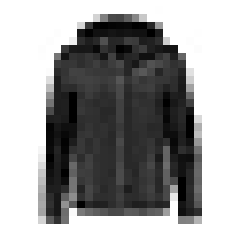

In [49]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

Let's take a look at a sample of the images in the dataset:

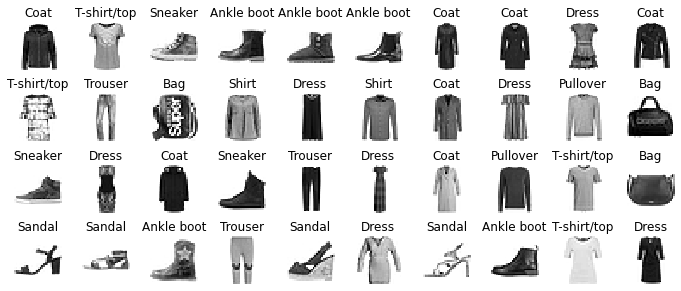

In [50]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## <font color=red>**4.3. Model**</font>

 ### <font color=blue>**Construct Model**

In [51]:
# refresh session for multiple run
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Initialize
model = Sequential()

# Adding input layers and hidden layers
model.add(Flatten(input_shape= [28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
# View layers
print(model.layers)

hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights()

[<keras.layers.core.flatten.Flatten object at 0x000002A4E31D0B50>, <keras.layers.core.dense.Dense object at 0x000002A4E7C6D2B0>, <keras.layers.core.dense.Dense object at 0x000002A4E6AD48E0>, <keras.layers.core.dense.Dense object at 0x000002A4E6BBD0D0>]
dense


In [54]:
print(weights.shape)
print(weights)
print()
print(biases.shape)
print(biases)

(784, 300)
[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]

(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 ### <font color=blue>**Training model**

In [55]:
# compiling model
model.compile(loss='sparse_categorical_crossentropy',  # keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',   # keras.optimizers.SGD()
              metrics='accuracy')  # keras.metrics.sparse_category_accuracy

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
model.save("fashion_mnis_model.h5")
model.save_weights("fashion_mnis_model_weights.ckpt")

# keras.models.load_model("fashion_mnis_model.h5") 
# model.load_weights("fashion_mnis_model_weights.ckpt")

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3917 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8617 - val_loss: 0.3752 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3620 - val_accuracy:

 ### <font color=blue>**Plot loss history**

In [56]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


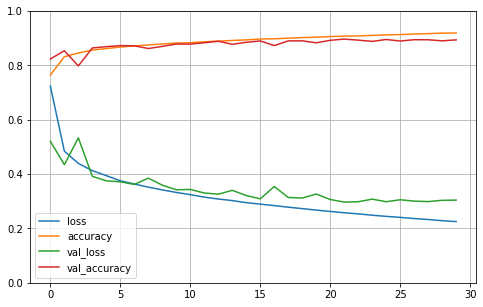

In [57]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 ### <font color=blue>**Performance Evaluation**

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8830


[0.3383956849575043, 0.8830000162124634]

 ### <font color=blue>**Prediction**

In [59]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [60]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_test[:3])
print(np.array(class_names)[y_pred])

[9 2 1]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


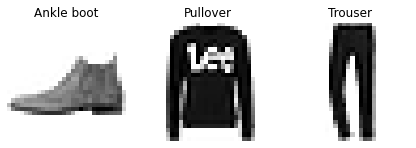

In [61]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## <font color=red>**4.4. Techniques**</font>

 ### <font color=blue>**Using Callbacks during Training**

In [62]:
# refresh session for multiple run
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Initialize
model = Sequential()

# Adding input layers and hidden layers
model.add(Flatten(input_shape= [28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compiling model
model.compile(loss='sparse_categorical_crossentropy',  # keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',   # keras.optimizers.SGD()
              metrics='accuracy')  # keras.metrics.sparse_category_accuracy
checkpoint_cb = keras.callbacks.ModelCheckpoint("fashion_mnis_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("fashion_mnis_model.h5") # rollback to best 
model.evaluate(X_test, y_test)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3917 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8617 - val_loss: 0.3752 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3620 - val_accuracy:

[0.3318156599998474, 0.8808000087738037]

 ### <font color=blue>**Early Stopping**

In [63]:
# compiling model
model.compile(loss='sparse_categorical_crossentropy',  # keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',   # keras.optimizers.SGD()
              metrics='accuracy')  # keras.metrics.sparse_category_accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
model.evaluate(X_test, y_test)

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9088 - val_loss: 0.2980 - val_accuracy: 0.8910
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2488 - accuracy: 0.9099 - val_loss: 0.2974 - val_accuracy: 0.8940
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2444 - accuracy: 0.9114 - val_loss: 0.3739 - val_accuracy: 0.8620
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2402 - accuracy: 0.9141 - val_loss: 0.2973 - val_accuracy: 0.8940
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2381 - accuracy: 0.9140 - val_loss: 0.2880 - val_accuracy: 0.8968
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.9170 - val_loss: 0.2994 - val_accuracy: 0.8940
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2284 - accuracy: 0.9189 - val_loss: 0.2945 - val_ac

[0.31801050901412964, 0.8859000205993652]

In [64]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [65]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

1710/1719 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9303
val/train: 1.48
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1934 - accuracy: 0.9303 - val_loss: 0.2857 - val_accuracy: 0.8968


 ### <font color=blue>searching for the optimal learning rate
    
Build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [97]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [99]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [100]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 6s 3ms/step - loss: 1.9122 - accuracy: 0.3411 - val_loss: 0.4017 - val_accuracy: 0.8876


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

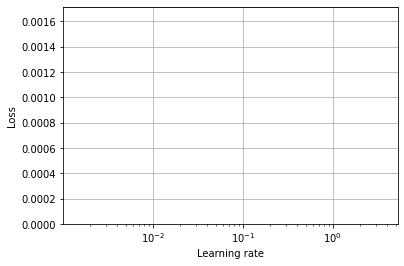

In [86]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">5. MNISTS</div>

 ## <font color=red>**5.1. Data**</font>

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [70]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train_full.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [71]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

## <font color=red>**5.2. Data Visualization**</font>

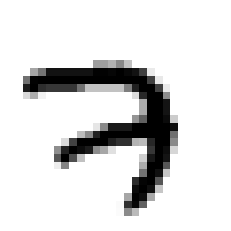

In [72]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

Let's take a look at a sample of the images in the dataset:

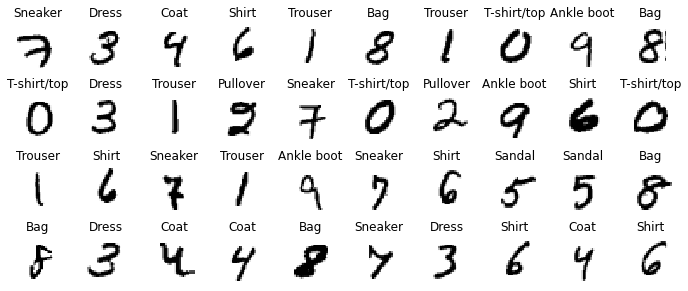

In [73]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## <font color=red>**5.3. Model**</font>

 ### <font color=blue>searching for the optimal learning rate
    
Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:
    
+ Growing the learning rate exponentially
+ Plotting the loss, finding the point where the loss shoots up
+ Save checkpoints, use early stopping
+ Plot learning curves using TensorBoard </font>    

In [101]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [102]:
keras.backend.clear_session()
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

# train the model for just 1 epoch
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 4s 2ms/step - loss: 1.8709 - accuracy: 0.3674 - val_loss: 0.3848 - val_accuracy: 0.8914


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

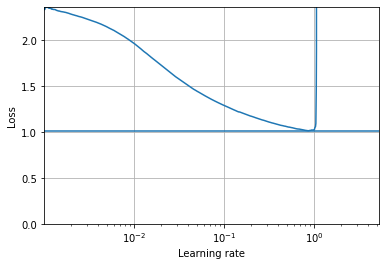

In [77]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [80]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [81]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2363 - accuracy: 0.9265 - val_loss: 0.1014 - val_accuracy: 0.9702
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9704 - val_loss: 0.1081 - val_accuracy: 0.9674
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9786 - val_loss: 0.0838 - val_accuracy: 0.9744
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9835 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0762 - val_accuracy: 0.9808
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0780 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0954 - val_ac

In [82]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9789


[0.0731990709900856, 0.9789000153541565]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [83]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6008